In [ ]:
import pandas as pd


eoe_df = pd.read_excel("/content/Final_EOE_Dataset_V2.xlsx")

print(eoe_df.head())

eoe_df.to_csv("eoe_data.csv", index=False)

       !Sample_title      E51      E60     E139     E109     E208     E238  \
0  TC0100006437.hg.1  4.61101  3.93670  4.50632  3.25702  3.43970  3.61398   
1  TC0100006476.hg.1  5.18858  4.69930  4.75295  5.41349  5.41200  5.17729   
2  TC0100006479.hg.1  4.76671  5.07218  4.86237  5.35532  4.81166  4.45512   
3  TC0100006480.hg.1  5.99295  5.03977  5.73988  5.61755  6.01122  5.51166   
4  TC0100006483.hg.1  5.90252  5.70587  6.02649  5.24064  6.29135  4.96404   

      E285     E266     E282  ...     C212     C102     C194     C180  \
0  4.01474  3.94419  4.06883  ...  3.45582  3.42089  3.82201  3.44718   
1  4.97784  4.89836  4.88841  ...  5.22657  5.13776  3.95715  5.21787   
2  5.04126  5.47324  4.94555  ...  5.14163  5.21066  4.48366  4.83351   
3  6.07212  5.24071  6.34674  ...  6.61143  6.54831  7.56805  7.31333   
4  4.99105  5.05505  4.53265  ...  5.14277  4.69743  5.08882  5.53542   

      C200     C169     C160     C280     C276  Extracted Gene Names  
0  3.88868  3.62428  

In [ ]:
import pandas as pd

data = pd.read_csv('eoe_data.csv')

data_dropped = data.iloc[:, 1:-1]

transposed_data = data_dropped.T

transposed_data.index = transposed_data.index.str.startswith('E').astype(int)

print(transposed_data)


     0        1        2        3        4        5        6        7      \
1  4.61101  5.18858  4.76671  5.99295  5.90252  6.30593  4.88346  5.18739   
1  3.93670  4.69930  5.07218  5.03977  5.70587  4.94126  4.63002  6.11360   
1  4.50632  4.75295  4.86237  5.73988  6.02649  5.20489  5.16173  6.20032   
1  3.25702  5.41349  5.35532  5.61755  5.24064  6.12718  4.28320  5.67839   
1  3.43970  5.41200  4.81166  6.01122  6.29135  4.24203  6.04386  6.35652   
1  3.61398  5.17729  4.45512  5.51166  4.96404  6.24263  4.72898  5.61296   
1  4.01474  4.97784  5.04126  6.07212  4.99105  5.18019  4.76295  5.79796   
1  3.94419  4.89836  5.47324  5.24071  5.05505  6.05403  5.03961  5.29539   
1  4.06883  4.88841  4.94555  6.34674  4.53265  5.63077  4.74499  5.66557   
1  3.56435  4.94963  5.27088  6.44707  5.28232  5.25272  4.56062  6.52139   
1  3.91653  4.80516  5.16140  5.44060  5.19331  5.88902  4.11135  5.21618   
1  3.58413  4.85533  4.82544  6.68790  4.86229  5.32185  4.70684  5.24996   

In [ ]:
import numpy as np

transposed_file_name = 'transposed_data.csv'

np.savetxt(transposed_file_name, transposed_data, delimiter=',', fmt='%s')

print(f"Transposed data has been saved to '{transposed_file_name}'")


Transposed data has been saved to 'transposed_data.csv'


In [ ]:
transposed_df = pd.read_csv(transposed_file_name, header=None)

def normalize_df(transposed_df):
    numeric_df = transposed_df.apply(pd.to_numeric, errors='coerce')
    min_values = np.min(numeric_df, axis=0)
    max_values = np.max(numeric_df, axis=0)
    scaled_df = (numeric_df - min_values) / (max_values - min_values)
    return scaled_df

scaled_data = normalize_df(transposed_df)
print(scaled_data)
scaled_data.to_csv('scaled_data.csv',index=False)

       0         1         2         3         4         5         6      \
0   1.000000  0.755942  0.304775  0.377007  0.778911  1.000000  0.399537   
1   0.505529  0.455586  0.603564  0.000000  0.667095  0.338791  0.268392   
2   0.923231  0.488521  0.398343  0.276912  0.849400  0.466525  0.543531   
3   0.007120  0.894009  0.880512  0.228527  0.402564  0.913392  0.088926   
4   0.141079  0.893094  0.348742  0.384234  1.000000  0.000000  1.000000   
5   0.268879  0.749012  0.000000  0.186645  0.245289  0.969330  0.319600   
6   0.562756  0.626575  0.573321  0.408321  0.260647  0.454557  0.337178   
7   0.511021  0.577784  0.995853  0.079477  0.297038  0.877950  0.480339   
8   0.602420  0.571676  0.479704  0.516940  0.000000  0.672872  0.327884   
9   0.232485  0.609257  0.797919  0.556623  0.426264  0.489699  0.232480   
10  0.490738  0.520571  0.690833  0.158539  0.375652  0.797999  0.000000   
11  0.246990  0.551369  0.362221  0.651878  0.187434  0.523194  0.308143   
12  0.000000

In [ ]:
import pandas as pd

data = pd.read_csv("scaled_data.csv")

variance = data.var()

print("Variance of each column:")
print(variance)


Variance of each column:
0        0.064177
1        0.042383
2        0.067658
3        0.069074
4        0.059700
           ...   
21443    0.038322
21444    0.061395
21445    0.056891
21446    0.054549
21447    0.063501
Length: 21448, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("scaled_data.csv")

variance = data.var()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("scaled_data.csv")

variance = data.var()

top_100_variances = variance.sort_values(ascending=False).head(40)
top_100_variances


10872    0.144977
127      0.141480
10822    0.140543
7036     0.139869
126      0.136916
10856    0.135520
10830    0.135129
13725    0.131943
5833     0.128662
10821    0.128070
19819    0.127456
20723    0.127354
13565    0.126920
13730    0.126004
4788     0.125400
15640    0.121535
11002    0.121534
8982     0.121263
18379    0.120903
2503     0.120669
6461     0.120596
16313    0.119855
13963    0.119772
7612     0.119601
3130     0.119466
11353    0.118908
20486    0.118897
8160     0.118833
6189     0.118633
15176    0.118563
12750    0.118265
7070     0.117944
3147     0.117707
1341     0.117559
1872     0.117302
8734     0.116948
8300     0.116882
7212     0.116702
10332    0.116694
2892     0.116328
dtype: float64

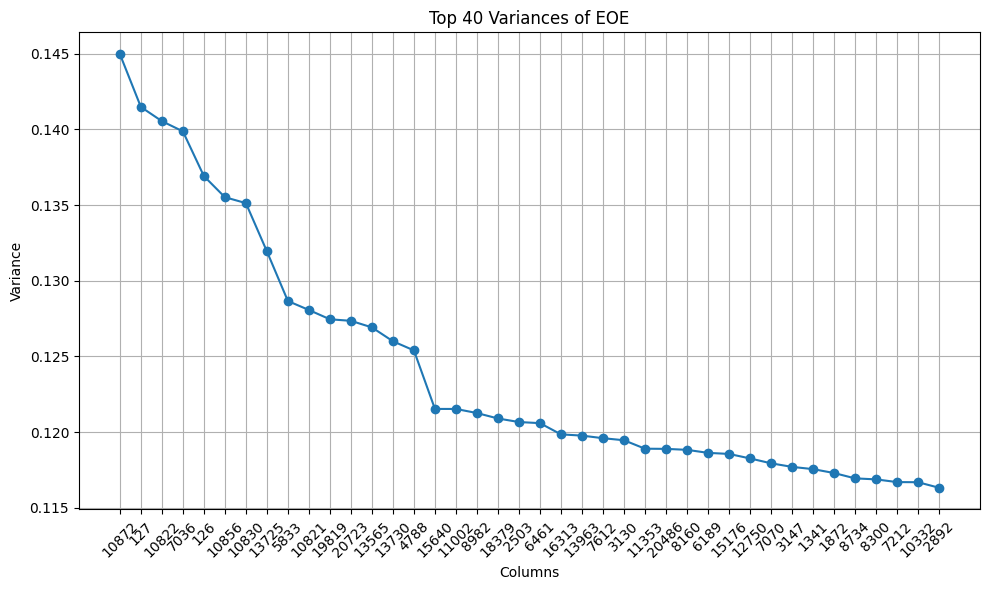

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("scaled_data.csv")

variance = data.var()

top_40_variances = variance.sort_values(ascending=False).head(40)

plt.figure(figsize=(10, 6))
plt.plot(top_40_variances, marker='o', linestyle='-')
plt.title('Top 40 Variances of EOE')
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

top_100_indexes = top_100_variances.index

print(top_100_indexes)

Index(['10872', '127', '10822', '7036', '126', '10856', '10830', '13725',
       '5833', '10821', '19819', '20723', '13565', '13730', '4788', '15640',
       '11002', '8982', '18379', '2503', '6461', '16313', '13963', '7612',
       '3130', '11353', '20486', '8160', '6189', '15176', '12750', '7070',
       '3147', '1341', '1872', '8734', '8300', '7212', '10332', '2892'],
      dtype='object')


In [ ]:
indexes_without_quotes = [int(index) for index in top_100_indexes]
print(indexes_without_quotes)


[10872, 127, 10822, 7036, 126, 10856, 10830, 13725, 5833, 10821, 19819, 20723, 13565, 13730, 4788, 15640, 11002, 8982, 18379, 2503, 6461, 16313, 13963, 7612, 3130, 11353, 20486, 8160, 6189, 15176, 12750, 7070, 3147, 1341, 1872, 8734, 8300, 7212, 10332, 2892]


In [ ]:


import pandas as pd

data = pd.read_excel('/content/Final_EOE_Dataset_V2.xlsx')

indices = [10871, 126, 10821, 7035, 125, 10855, 10829, 13724, 5832, 10820, 19818, 20722, 13564, 13729, 4787, 15639, 11001, 8981, 18378, 2502, 6460, 16312, 13962, 7611, 3129, 11352, 20485, 8159, 6188, 15175, 12749, 7069, 3146, 1340, 1871, 8733, 8299, 7211, 10331, 2891
]
gene_names = data.loc[indices, 'Extracted Gene Names']

print(gene_names)

10871        ASMT
126           CDA
10821       USP9Y
7035       CRISP2
125        FAM43B
10855    FAM197Y1
10829      TXLNGY
13724      PTGES3
5832        EXOC3
10820      TSPY10
19818     FAM217B
20722     SLC16A8
13564       RECQL
13729       STAT6
4787      MTHFD2L
15639       FOXB1
11001      ARID5B
8981          ARC
18378       CILP2
2502        G6PC2
6460        MUC22
16312       CBLN1
13962     SLC48A1
7611       STEAP2
3129        HIBCH
11352      ZFAND4
20485      RNF185
8159        SVOPL
6188        EXOC3
15175         DUT
12749     PPP2R1B
7069       MB21D1
3146         BOLL
1340       LRRC40
1871        EXOC8
8733         PSD3
8299        FSCN3
7211        FUCA2
10331       PNMA3
2891       CLEC4F
Name: Extracted Gene Names, dtype: object
